**Step-1**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Step-2**

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info() #this will give the information about how many null values in the all columns each and their datatypes
#here this data is after EDA beacuase it is clean if it not you have to do EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Objective :**
    
    - Predict the quality of wine

- you can only apply ML models on numeric data only

- In above dataset target column is : Quality

- You need to predict the quality of wine based on input given columns

- The target column data type should be numerical in linear regression

- If you have any categorical input data convert into numerical using (label enocder,or one hot encoder)before apply ML models

- If you have any missing values impute before apply ML model


**Process To Apply ML Model**

- First we will divide data into 2 parts

- Train and Test data with the ratio of 80:20 or 70:30

- **X : input columns**
- **Y : Output columns**

- Train data has both input and output data : **X_train , Y_train**

- Test data also has both input and output data : **X_test , Y_test**

- we will develop model using train data **x_train,y_train**

- Once model is ready we will pass the X-test alone to the developed model

- Then the model will give some output values , these are called **y_predictions**

- Finally we compare y_test  with y_predictions

- Then we will calculate all the metrics

**Step-3 :**

- In order to divide train and test data, first seperate input and output columns/data



In [11]:
df.columns #here we will get all the columns , here quality is our output data
#from this df we need to create 
# X : input data
# Y : output data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# If i drop the quality column i will get all the input data right?
# Then select the quality column from the original data it will gives the output(Y) data
X = df.drop('quality',axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
#here we are only selecting output data(quality data(Y))
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

**Step-4 :**

- split the data into train and test

- In sklearn.model_selection it self has method called train_test_split 
 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234) #it will return 4 values like the oredr is
#X_train,X_test,y_train,y_test

In [17]:
#check the dimensions using shape is it dividing 80:20% of df.shape(1599)

In [18]:
print(X_train.shape) #80% of total data(1599 total 1599*80/100) we got (1279, 11) one column we dropped right? so 11
print(X_test.shape) #(320, 11) we got it is out of 20%(1599*20/100) of test data with only input columns so why 11
print(y_train.shape) #y is only one column it is y_train so why (1279,) rows ((y_test))
print(y_test.shape) #(320,) out of 20% test output(y) data(y_test)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [19]:
y_train[0:5]

441     6
227     5
1386    5
1245    5
60      5
Name: quality, dtype: int64

                                      **All Steps Together**

In [22]:
#step-1
df = pd.read_csv('winequality-red.csv')

#step-2
X = df.drop('quality',axis=1)
y = df['quality']


#step-3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=1234)
#step-4
#check the dimensions using shape is it dividing 80:20% of df.shape(1599)
print(X_train.shape) #80% of total data(1599 total 1599*80/100) we got (1279, 11) one column we dropped right? so 11
print(X_test.shape) #(320, 11) we got it is out of 20%(1599*20/100) of test data with only input columns so why 11
print(y_train.shape) #y is only one column it is y_train so why (1279,) rows ((y_test))
print(y_test.shape) #(320,) out of 20% test output(y) data(y_test)


(1279, 11)
(320, 11)
(1279,)
(320,)


*Step-5*

**Develop the ML Model :**

    - Read Package
    
    - Save the package
    
    - apply fit transform



In [24]:
from sklearn.linear_model import LinearRegression #Read the package is done
LR = LinearRegression() #save the package 
LR.fit(X_train,y_train) #only fit here not fit_transform() , fit the training data both input(X) and output(y)
LR

LinearRegression()

In [25]:
#next step is pass the test input data to get the predictions
# and compare the predicted data with test output data
#here our model is LR
y_predictions=LR.predict(X_test) #here we passed 320 values(20% of test input(X) data)
#here model predicted len(y_predictions)=320 y-predicted values
#next step is compare these values with y_test values to know the accuracy

*Step-6*

**Compare original values(y_test) with model predicted values y_predictions**

- First 5 rows of each are enough to compare is model predicting good or no

In [27]:
#next step :
# is compare all predicted values with y_test values to know the accuracy
y_test[:5].values,y_predictions[:5] #.values return only values in array format. here we comparing 1st
# s values of each, all the values are almost nearly matching with y_test(original output values)

(array([5, 5, 6, 6, 7], dtype=int64),
 array([5.18402693, 5.35222632, 5.59491103, 5.52091961, 6.34175415]))

*Step-7*

**Metrics : Evaluation**

**import all the regression metrices(MSE,RMSE,R-score,MAE(Mean Absolute Error))**

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [32]:
mean_squared_error(y_test,y_predictions) #you have to pass y_test(original) and y_predicted
# we got 0.37988847344103566 the MSE says your actual output(y_test) is deviated appoximately 0.38
# ex if your actual is 5 your model predicted 5.38. if actual is 6 your model may predicted 5.62(6-0.38) like that

0.37988847344103566

In [33]:
print(mean_squared_error(y_test,y_predictions))
print(r2_score(y_test,y_predictions))
print(mean_absolute_error(y_test,y_predictions))
print(root_mean_squared_error(y_test,y_predictions)) #these all are metrics

0.37988847344103566
0.3675833642704224
0.4703647723874762
0.6163509336741818


**r-score manual calculation :**

In [35]:
ymean=y_test.mean()
summation1=summation2=0
for i,j in zip(y_test.values,y_predictions):
    summation1+=pow(i-j,2)
for i in y_test.values:
    summation2+=pow(i-ymean,2)
r_score = 1-(summation1/summation2)
print(r_score) #chack above it is same 

0.36758336427042415


**Mean squared error manual calculation :**

In [37]:
# summ(y_test-y_pred)^2

# will take each observation: for loop
# will do subtraction
# will do the square
# summation
# summation/n


In [38]:
summation=0
for i,j in zip(y_test.values,y_predictions):
    summation+=pow(i-j,2)
n=y_test.shape[0]
mean_squared_error = summation/n
print(mean_squared_error) #chack above it is same 

0.3798884734410356


**From Mean squared error(MSE)  manual calculation of Root of Mean squared error(RMSE)  :**

In [82]:
RMSE = np.sqrt(mean_squared_error)
print(RMSE) 

0.6163509336741818


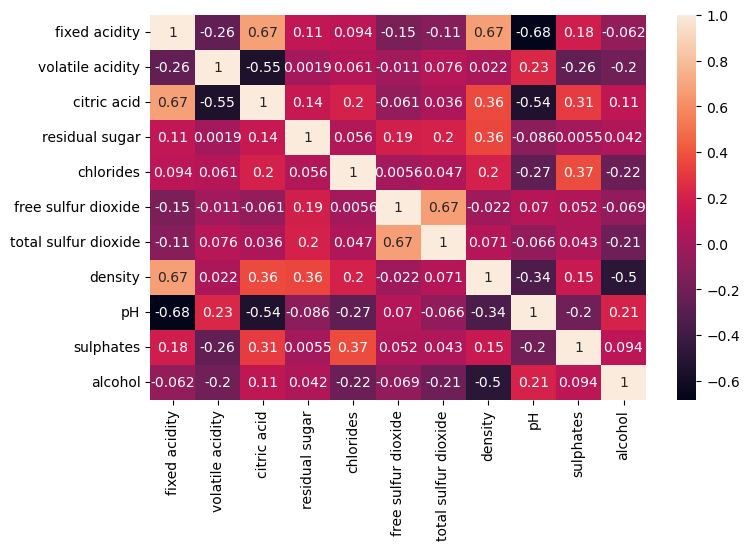

In [102]:
plt.figure(figsize=(8,5))
corr=X.corr()
sns.heatmap(corr,annot=True)
plt.show()

**Important Points :**

- The above heat map explains relationship between variables
  
- 1  -> positive correlation(means one variable increases automatically another variable also increases)
  
- -1   ->Negative correlation(means one variable increases  another variable decreases)

- 0 -> no correlation
  
- in our heat map some values are near to 1, ex 0.68,0.67 etc those are highly correlated each other,
  
- we know variables should not have relationship with each other it may cause multicoliniarity
  
- it may effect the regression model, that's why our r-score is less

*Step-8*

**Save model in local storage**

-  we use pickle package to store the model in local system

-  pickle.dump(parameters) method is used

-  parameters are model_name,open(path,'wb'),

-  path => relative path(if any other location) with the name of the model(in what name you are going
  to save with ".pkl" extension)

-  wb => write the bits (saving means writing,for model it is in bits)

-  we use "load" to load the model which is already saved using "dump" method

In [117]:
import pickle
pickle.dump(LR,
            open('wineQualityCheckModel.pkl','wb')) #for model extension we use .pkl(pickle)


**To save the model we use pickel package and joblib**

**If your in DL you have to use tensorflow(google framework) to save the model like tf.save**

**Lets think you shared the model to your freind now your friend need to load the model** 

**We only load the model in LoadModel.ipynb file By assuming i am the friend who got that model**